In [49]:
#Loading Dataset for classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('/Users/aneeshks/Documents/Personal/Learning/Coursera/AMLP/fruit_data_with_colors.txt')

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [62]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version)) # scipy
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy
print('numpy: {}'.format(numpy.__version__)) # matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas
print('pandas: {}'.format(pandas.__version__)) # scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
scipy: 0.19.0
numpy: 1.12.1
matplotlib: 2.0.2
pandas: 0.20.1
sklearn: 0.18.1


In [50]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=seed)


In [148]:
print(fruits.head(1))

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55


In [66]:
print(fruits.describe())

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


In [67]:
print(fruits.groupby('fruit_label').size())

fruit_label
1    19
2     5
3    19
4    16
dtype: int64


In [150]:
print(fruits.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(59, 7)
(44, 3)
(44,)
(15, 3)
(15,)


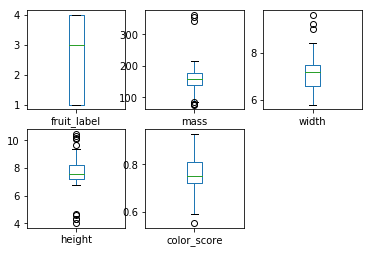

In [152]:
# box and whisker plots
fruits.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()


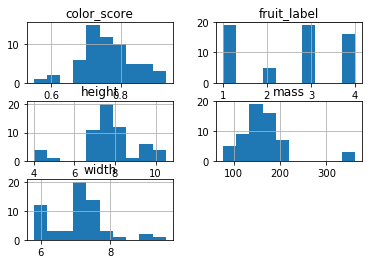

In [86]:
fruits.hist()
plt.show()

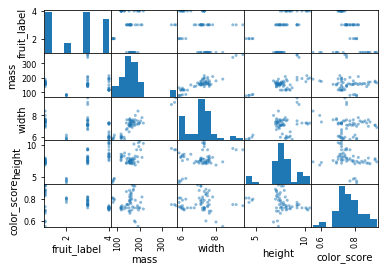

In [89]:
# scatter plot matrix
pd.plotting.scatter_matrix(fruits)
plt.show()

In [51]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn

In [52]:
# Add Libararies 
import pandas
import numpy
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [53]:
seed = 7
scoring = 'accuracy'

In [107]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results*100)
	names.append(name)
	msg = "%s: %f (%f)" % (name, 100.0*cv_results.mean(), cv_results.std())
	print(msg)

LR: 68.000000 (0.169115)
LDA: 90.500000 (0.117154)
KNN: 62.500000 (0.140089)
CART: 87.000000 (0.140000)
NB: 71.000000 (0.146287)
SVM: 52.500000 (0.186078)


In [105]:
results

[array([ 55.55555556,  55.55555556,  55.55555556,  66.66666667,  62.5       ]),
 array([  88.88888889,   88.88888889,   88.88888889,   77.77777778,  100.        ]),
 array([ 44.44444444,  33.33333333,  44.44444444,  88.88888889,  62.5       ]),
 array([  77.77777778,   77.77777778,  100.        ,   88.88888889,   75.        ]),
 array([ 44.44444444,  44.44444444,  44.44444444,  77.77777778,  62.5       ]),
 array([ 44.44444444,  33.33333333,  33.33333333,  66.66666667,  75.        ])]

In [101]:
cv_results.std()

0.17249082995844472

In [60]:
cv_results.mean()

0.52500000000000002

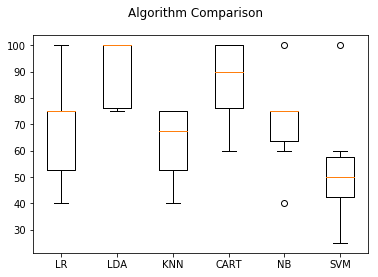

In [108]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [156]:
# Make predictions on validation dataset using KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.predictions = knn.predict(X_test)

print(accuracy_score(Y_test, knn.predictions))
print(confusion_matrix(Y_test, knn.predictions))
print(classification_report(Y_test, knn.predictions))

0.466666666667
[[3 4 0]
 [1 4 0]
 [1 2 0]]
             precision    recall  f1-score   support

          1       0.60      0.43      0.50         7
          3       0.40      0.80      0.53         5
          4       0.00      0.00      0.00         3

avg / total       0.41      0.47      0.41        15



/Users/aneeshks/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [157]:
# Make predictions on validation dataset using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda.predictions = lda.predict(X_test)

print(accuracy_score(Y_test, lda.predictions))
print(confusion_matrix(Y_test, lda.predictions))
print(classification_report(Y_test, lda.predictions))

0.6
[[4 3 0]
 [2 2 1]
 [0 0 3]]
             precision    recall  f1-score   support

          1       0.67      0.57      0.62         7
          3       0.40      0.40      0.40         5
          4       0.75      1.00      0.86         3

avg / total       0.59      0.60      0.59        15



In [158]:
# Make predictions on validation dataset using CART
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
cart.predictions = cart.predict(X_test)

print(accuracy_score(Y_test, cart.predictions))
print(confusion_matrix(Y_test, cart.predictions))
print(classification_report(Y_test, cart.predictions))

0.6
[[5 2 0]
 [3 2 0]
 [1 0 2]]
             precision    recall  f1-score   support

          1       0.56      0.71      0.63         7
          3       0.50      0.40      0.44         5
          4       1.00      0.67      0.80         3

avg / total       0.63      0.60      0.60        15

